In [22]:
!pip install scikit-survival
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator
import math
#from google.colab import files

In [23]:
#uploaded=files.upload()

In [24]:
df = pd.read_csv('finalDataset.csv')
float_df = df["Pressure Array"].apply(lambda x: [float(el) for el in x.strip("[]").split(",")])
df["Pressure Array"] = float_df

In [25]:
from scipy import integrate

In [ ]:
def create_survival_analysis(df):

    frames = []
    pressure_values = []

    for _, row in df.iterrows():
        cur_frames = []
        cur_pressure_values = []
        for frame in range(43):
            if not math.isnan(row[frame]):
                cur_frames.append(frame)
                cur_pressure_values.append(row[frame])
        pressure_values.extend(cur_pressure_values)
        frames.extend(cur_frames)

    survival_values = pd.DataFrame({'Frame': frames, 'Pressure': pressure_values})
    survival_values['g90'] = np.where(survival_values['Pressure'] >= 0.9, True, False)

    pred_frame, pred_survival_prob = kaplan_meier_estimator(survival_values["g90"], survival_values["Frame"])
    plt.plot(pred_frame, pred_survival_prob)
    plt.ylabel("Survival Probability")
    plt.xlabel("Elapsed Frames")
    #plt.show()
    return [pred_frame, pred_survival_prob]

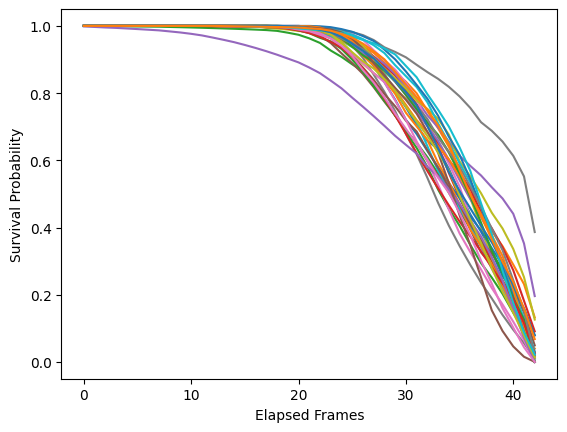

In [26]:
all_team_pressures = []
all_team_survival_auc = []
teams = df["possessionTeam"].unique()
for team in teams:
  team_pressure_array = [team]
  team_survival_auc = [team]
  team_df = df.loc[df["possessionTeam"]==team]
  team_pressure = team_df['Pressure Array']
  lst = []
  for index, row in team_df.iterrows():
    lst.append(row['Pressure Array'])
  lst_df = pd.DataFrame(lst)
  survival_curve = create_survival_analysis(lst_df)
  survival_curve [0] = 0.1 * survival_curve[0]
  # survival_value = 1 - survival_curve['Pressure']
  survival_auc = integrate.simpson(survival_curve[1], survival_curve[0], axis=0)
  #print(survival_curve)
  team_survival_auc.append(survival_auc)
  all_team_survival_auc.append(team_survival_auc)
  

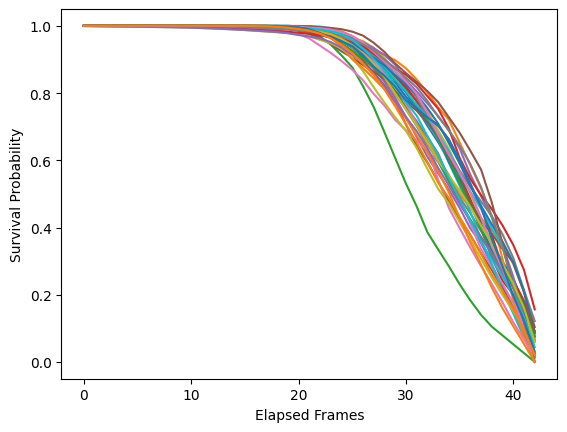

In [27]:
all_team_pressures = []
all_team_survival_auc_defence = []
teams = df["defensiveTeam"].unique()
for team in teams:
  team_pressure_array = [team]
  team_survival_auc = [team]
  team_df = df.loc[df["defensiveTeam"]==team]
  team_pressure = team_df['Pressure Array']
  lst = []
  for index, row in team_df.iterrows():
    lst.append(row['Pressure Array'])
  lst_df = pd.DataFrame(lst)
  survival_curve = create_survival_analysis(lst_df)
  survival_curve [0] = 0.1 * survival_curve[0]
  # survival_value = 1 - survival_curve['Pressure']
  survival_auc = integrate.simpson(survival_curve[1], survival_curve[0], axis=0)
  #print(survival_curve)
  team_survival_auc.append(survival_auc)
  all_team_survival_auc_defence.append(team_survival_auc)

In [28]:
print(Sort(all_team_survival_auc_defence))

[['PHI', 3.085933909271578], ['WAS', 3.2911674834881524], ['CAR', 3.324505100660704], ['CLE', 3.324812485810813], ['LV', 3.3428467165798454], ['BUF', 3.3495422829996837], ['ARI', 3.3628079971142415], ['GB', 3.3741270050452794], ['PIT', 3.3795493136880665], ['MIA', 3.4213719743899755], ['CHI', 3.4431493096850887], ['NYJ', 3.4499954545145406], ['LA', 3.4502801715940747], ['MIN', 3.4577984205837256], ['DAL', 3.474744061191366], ['SF', 3.480550320544061], ['IND', 3.4816985409220655], ['TB', 3.4874358038575557], ['ATL', 3.494841115713185], ['JAX', 3.498522588084329], ['BAL', 3.500812676749227], ['DEN', 3.515858100622169], ['LAC', 3.519900806779667], ['CIN', 3.5268202821086], ['HOU', 3.528764014796588], ['KC', 3.5590038076661377], ['TEN', 3.5614894542624946], ['NYG', 3.5699281563498158], ['SEA', 3.5752823239548834], ['DET', 3.5873221270695432], ['NE', 3.5979782289367543], ['NO', 3.6375491226721897]]


In [29]:
def Sort(sub_li):
    l = len(sub_li)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (sub_li[j][1] > sub_li[j + 1][1]):
                tempo = sub_li[j]
                sub_li[j]= sub_li[j + 1]
                sub_li[j + 1]= tempo
    return sub_li

In [30]:
print(Sort(all_team_survival_auc))
print(Sort(all_team_survival_auc_defence))

[['NO', 3.1752979810622546], ['CAR', 3.2726384120139183], ['HOU', 3.303099542545306], ['NYG', 3.3132853879463635], ['TEN', 3.3153627672155], ['ATL', 3.3223622851620096], ['MIA', 3.324513299923302], ['PIT', 3.337741533754656], ['GB', 3.3607662945469423], ['SEA', 3.3894785324509353], ['CIN', 3.3952184638935523], ['SF', 3.3962250640569285], ['CHI', 3.407708638630218], ['DET', 3.425440556480023], ['MIN', 3.44290858597717], ['DAL', 3.4500099592487006], ['PHI', 3.4533324149888425], ['NYJ', 3.4714746085956816], ['IND', 3.478252196203847], ['NE', 3.4817002314296737], ['KC', 3.4823070077679334], ['LV', 3.4841220577698553], ['DEN', 3.5199955737235085], ['JAX', 3.5214730562456817], ['BAL', 3.5342680305574103], ['WAS', 3.553510390772594], ['TB', 3.5593240013384224], ['CLE', 3.5707435370530387], ['LA', 3.5723071139911218], ['LAC', 3.584071121779626], ['BUF', 3.627856877409502], ['ARI', 3.853708574153357]]
[['PHI', 3.085933909271578], ['WAS', 3.2911674834881524], ['CAR', 3.324505100660704], ['CLE', 

In [32]:
off_auc_df = pd.DataFrame(all_team_survival_auc, columns=['team', 'auc'])
def_auc_df = pd.DataFrame(all_team_survival_auc_defence, columns=['team', 'auc'])
auc_median = off_auc_df['auc'].median()
auc_defense_median = def_auc_df['auc'].median()

off_auc_df['off_auc_above_median'] = off_auc_df['auc'] - auc_median
def_auc_df['def_auc_above_median'] = def_auc_df['auc'] - auc_defense_median

In [33]:
full_auc_df = pd.merge(off_auc_df, def_auc_df, on=['team'], how="outer")

In [34]:
team_dict = {'SF': '49ers', 'CHI': 'bears', 'CIN': 'bengals', 'CIN': 'bengals', 'BUF': 'bills', 'DEN': 'broncos', 'CLE': 'browns', 'TB': 'buccaneers', 'ARI': 'cardinals', 'LAC': 'chargers', 'KC': 'chiefs', 'IND': 'colts', 'DAL': 'cowboys', 'MIA': 'dolphins', 'PHI': 'eagles', 'ATL': 'falcons', 'NYG': 'giants', 'JAX': 'jaguars', 'NYJ': 'jets', 'DET': 'lions', 'GB': 'packers', 'CAR': 'panthers', 'NE': 'patriots', 'LV': 'raiders', 'LA': 'rams', 'BAL': 'ravens', 'WAS': 'commanders', 'NO': 'saints', 'SEA': 'seahawks', 'PIT': 'steelers', 'HOU': 'texans', 'TEN': 'titans', 'MIN': 'vikings'}

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

#fig = go.Figure(data=go.Scatter(x=full_auc_df['off_auc_above_median'], y=full_auc_df['def_auc_above_median']))
fig = go.Figure()#px.scatter(x = full_auc_df['off_auc_above_median'], y = full_auc_df['def_auc_above_median'],)
fig.add_hline(y=0, line_color="black", opacity=0.3)
fig.add_vline(x=0, line_color="black", opacity=0.3)
fig.update_xaxes(range = [-0.45,0.45])
fig.update_yaxes(range = [-0.45,0.45])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    xaxis_title="Offensive Line Performance Above Average",
    yaxis_title="Defensive Line Performance Above Average",)
fig.add_annotation(dict(font=dict(color='black',size=15),
                        x=0.75,
                        y=0.95,
                        text="Good OL, Good DL",
                        showarrow=False,
                        textangle=0,
                        xanchor='left',
                        xref="paper",
                        yref="paper"))
fig.add_annotation(dict(font=dict(color='black',size=15),
                            x=0.75,
                            y=0.1,
                            text="Good OL, Bad DL",
                            showarrow=False,
                            textangle=0,
                            xanchor='left',
                            xref="paper",
                            yref="paper"))
fig.add_annotation(dict(font=dict(color='black',size=15),
                        x=0.02,
                        y=0.1,
                        text="Bad OL, Bad DL",
                        showarrow=False,
                        textangle=0,
                        xanchor='left',
                        xref="paper",
                        yref="paper"))       
fig.add_annotation(dict(font=dict(color='black',size=15),
                        x=0.02,
                        y=0.95,
                        text="Bad OL, Good DL",
                        showarrow=False,
                        textangle=0,
                        xanchor='left',
                        xref="paper",
                        yref="paper"))                                  


for _, row in full_auc_df.iterrows():
    cur_image = 'NFL/' + team_dict[row['team']] + '.png'
    fig.add_layout_image(
        x=row['off_auc_above_median'],
        y=row['def_auc_above_median'],
        source=Image.open(cur_image),
        xref="x",
        yref="y",
        sizex=0.045,
        sizey=0.045,
        xanchor="center",
        yanchor="middle",
    )
fig.data = fig.data[::-1]
fig.show()
